In [ ]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

#### Question 1 - Extracting Tesla Stock Data Using yfinance



In [ ]:
# create a ticker object for tesla
tesla = yf.Ticker("TSLA")
# extract stock info and save it in a dataframe (tesla_data)
tesla_data = tesla.history(period="max")
# reset the index
tesla_data.reset_index(inplace=True)
# display first five rows of df
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2 - Extracting Tesla Revenue Data Using Webscraping


In [ ]:
url = 'https://stockanalysis.com/stocks/tsla/revenue/'
html_data = requests.get(url).text

In [ ]:
soup = BeautifulSoup(html_data,"html5lib")

In [26]:
table_rows = soup.find_all('tr', class_='svelte-1yyv6eq')
df_tesla = []
for row in table_rows:
    temp = row.find_all('td')
    if not len(temp):
      continue
    data = {}
    data['fiscal_year_end'] = temp[0].text
    data['revenue'] = temp[1].text
    df_tesla.append(data)
df_tesla = pd.DataFrame(df_tesla)
df_tesla.tail()

,fiscal_year_end,revenue
20,"Jan 31, 2004",1.58B
21,"Feb 1, 2003",1.35B
22,"Feb 2, 2002",1.12B
23,"Feb 3, 2001",756.70M
24,"Jan 30, 1999",465.17M


### Question 3 - Extracting GameStop Stock Data Using yfinance


In [ ]:
# create a ticker object for tesla
GameStop = yf.Ticker("GME")
# extract stock info and save it in a dataframe (tesla_data)
GameStop_data = GameStop.history(period="max")
# reset the index
GameStop_data.reset_index(inplace=True)
# display first five rows of df
GameStop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping


In [ ]:
url = 'https://stockanalysis.com/stocks/gme/revenue/'
html_data = requests.get(url).text

In [ ]:
soup = BeautifulSoup(html_data,"html5lib")

In [27]:
table_rows = soup.find_all('tr', class_='svelte-1yyv6eq')
df_GameStop = []
for row in table_rows:
    temp = row.find_all('td')
    if not len(temp):
      continue
    data = {}
    data['fiscal_year_end'] = temp[0].text
    data['revenue'] = temp[1].text
    df_GameStop.append(data)
df_GameStop = pd.DataFrame(df_GameStop)
df_GameStop.tail()

,fiscal_year_end,revenue
20,"Jan 31, 2004",1.58B
21,"Feb 1, 2003",1.35B
22,"Feb 2, 2002",1.12B
23,"Feb 3, 2001",756.70M
24,"Jan 30, 1999",465.17M


### Question 5 - Tesla Stock and Revenue Dashboard

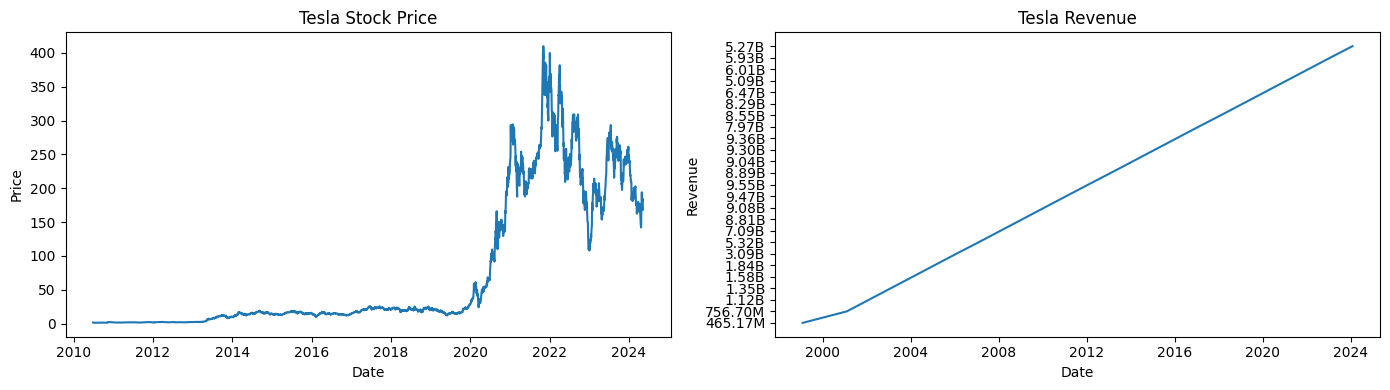

In [30]:
# Plot 1: Tesla Stock Price
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.lineplot(x=tesla_data['Date'], y=tesla_data['Close'])
plt.title('Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
# Plot 2: Tesla Revenue
plt.subplot(1, 2, 2)
temp_df_tesla = df_tesla.copy()
temp_df_tesla['fiscal_year_end'] = pd.to_datetime(temp_df_tesla['fiscal_year_end'])
sns.lineplot(x=temp_df_tesla['fiscal_year_end'], y=temp_df_tesla['revenue'])
plt.title('Tesla Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

### Question 6 - GameStop Stock and Revenue Dashboard

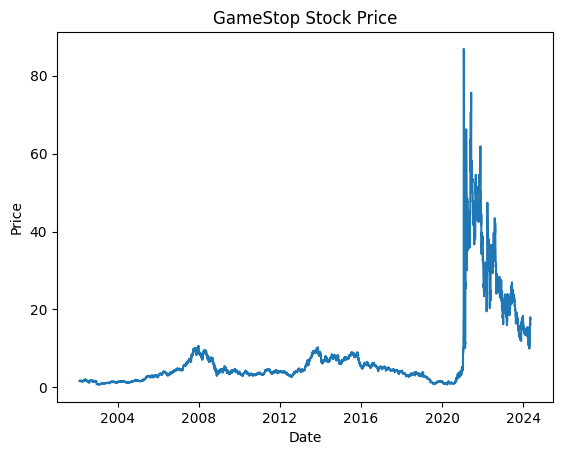

In [ ]:
sns.lineplot(x=GameStop_data['Date'], y=GameStop_data['Close'])
plt.title('GameStop Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Date vs Revenue plot

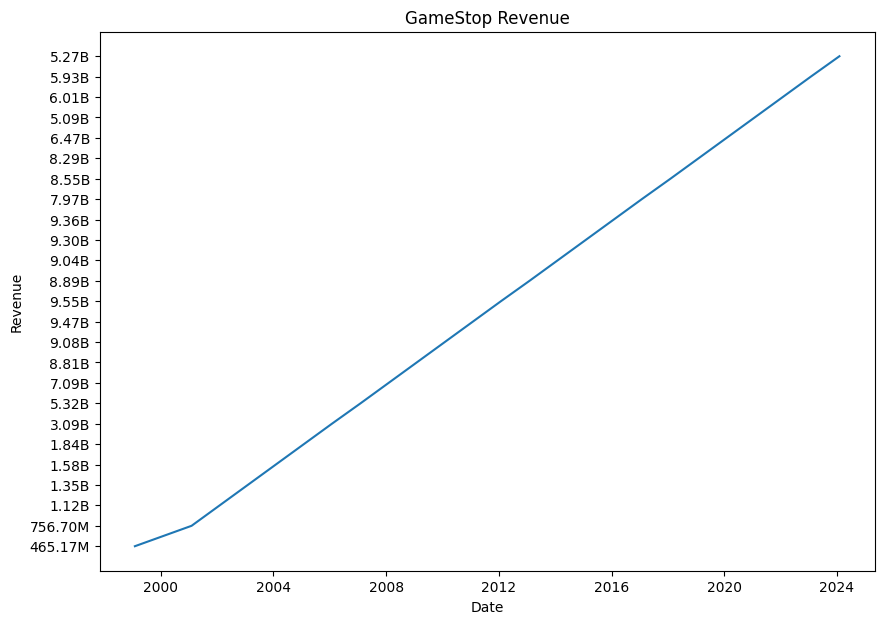

In [25]:
temp_df_GameStop = df_GameStop.copy()
temp_df_GameStop['fiscal_year_end'] = pd.to_datetime(temp_df_GameStop['fiscal_year_end'])
plt.figure(figsize=(10, 7))
sns.lineplot(x=temp_df_GameStop['fiscal_year_end'], y=temp_df_GameStop['revenue'])
plt.title('GameStop Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

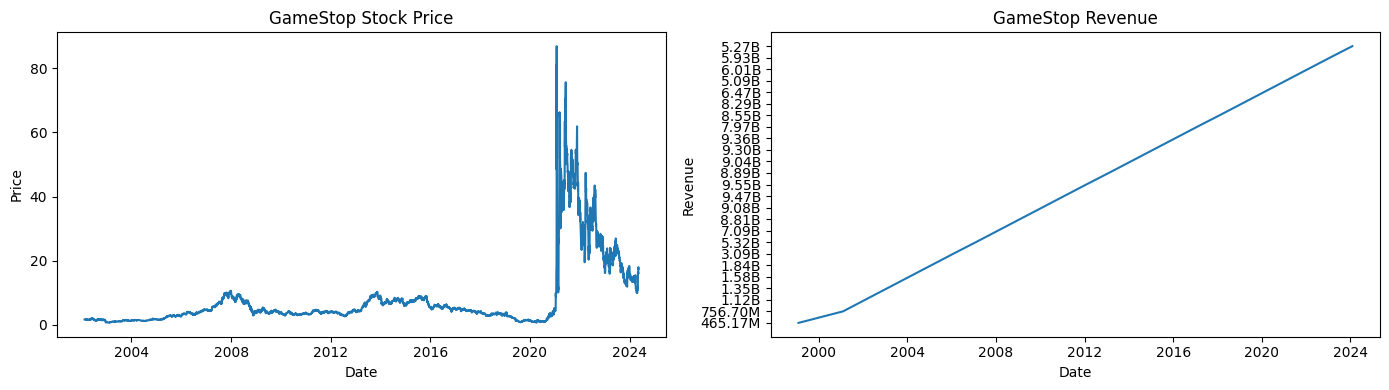

In [31]:
plt.figure(figsize=(14, 4))

# Plot 1: GameStop Stock Price
plt.subplot(1, 2, 1)
sns.lineplot(x=GameStop_data['Date'], y=GameStop_data['Close'])
plt.title('GameStop Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
# Plot 2: GameStop Revenue
plt.subplot(1, 2, 2)
temp_df_GameStop = df_GameStop.copy()
temp_df_GameStop['fiscal_year_end'] = pd.to_datetime(temp_df_GameStop['fiscal_year_end'])
sns.lineplot(x=temp_df_GameStop['fiscal_year_end'], y=temp_df_GameStop['revenue'])
plt.title('GameStop Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()
